In [41]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# MNIST

In [42]:
#how to load MNIST stably???

In [43]:
# Loading MNIST data

from six.moves import urllib
from sklearn.datasets import fetch_mldata
import requests
requests.packages.urllib3.disable_warnings()

"""
Adapted from the Github repo:
https://github.com/ageron/handson-ml
for the 03_classification notebook.
This implementation uses the 'requests' package instead of URLLIB
"""

try:
    mnist = fetch_mldata('MNIST original')
except urllib.error.HTTPError as ex:
    print("Could not download MNIST data from mldata.org, trying alternative...")

    # Alternative method to load MNIST, if mldata.org is down
    from scipy.io import loadmat
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    mnist_path = "./mnist-original.mat"
    response = requests.get(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.content
        f.write(content)
    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Success!")

In [44]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [45]:
X, Y = mnist["data"], mnist["target"]

In [46]:
X.shape

(70000, 784)

In [47]:
Y.shape

(70000,)

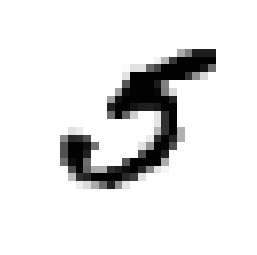

In [48]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [49]:
Y[36000]
X[36000]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 131, 225, 225, 225,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [50]:
# Separating into test and train sets

X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [51]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, Y_train = X_train[shuffle_index], Y_train[shuffle_index]

In [52]:
Y_train[36000]

0.0

In [53]:
Y_train_5 = (Y_train==5)
Y_test_5 = (Y_test==5)

In [54]:
Y_train_5[36000]

False

In [55]:
#SGD binary classifier (fitting and prediction)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state = 42)
sgd_clf.fit(X_train, Y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [56]:
sgd_clf.predict([X_train[36000]])

array([False])

In [57]:
#Accuracy: Cross-validation of SGD binary classifier

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, Y_train_5, cv=3, scoring="accuracy")

array([0.9502 , 0.96565, 0.96495])

In [58]:
#Confusion Matrix: Precision & Recall

from sklearn.model_selection import cross_val_predict

Y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train_5, cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(Y_train_5, Y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]])

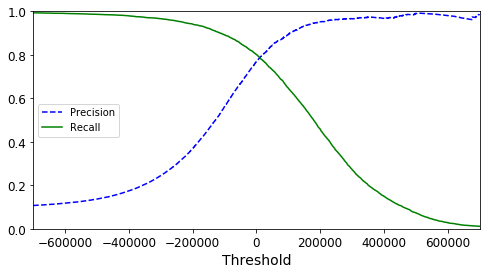

In [59]:
#Precision & Recall for all trains

Y_scores = cross_val_predict(sgd_clf, X_train, Y_train_5, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(Y_train_5, Y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.axis([-700000,700000,0,1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [60]:
# Scores (Precision & Recall) by thresholds

from sklearn.metrics import precision_score, recall_score

Y_train_predic_90 = (Y_scores > 70000)

precision_score(Y_train_5, Y_train_predic_90)

0.8659205116491548

In [61]:
recall_score(Y_train_5, Y_train_predic_90)

0.6993174691016417

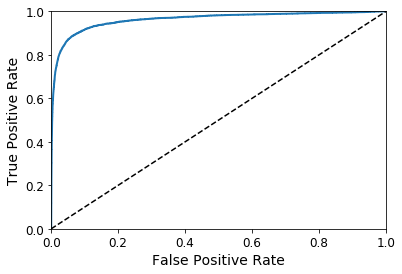

In [62]:
#ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(Y_train_5, Y_scores)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr,tpr)
plt.show()

In [63]:
#Area Under Curve

from sklearn.metrics import roc_auc_score

roc_auc_score(Y_train_5, Y_scores)

0.9624496555967155

In [64]:
# Multiclass classifier  

sgd_clf.fit(X_train, Y_train)
sgd_clf.predict([some_digit])

array([5.])

In [65]:
# It trained 10 binary classifier for each number

some_digit_scores=sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [66]:
np.argmax(some_digit_scores)

5

In [67]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [68]:
#Random Forest Classifier (multi-class classifier)

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,Y_train)
forest_clf.predict([some_digit])

array([5.])

In [69]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [70]:
cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring="accuracy")

array([0.84063187, 0.84899245, 0.86652998])

In [71]:
cross_val_score(forest_clf, X_train, Y_train, cv=3, scoring="accuracy")

array([0.94041192, 0.93879694, 0.93949092])

In [72]:
# Scaling inputs

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scale = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scale, Y_train, cv=3, scoring="accuracy")

array([0.91011798, 0.90874544, 0.906636  ])

In [73]:
  #Scaling doesn't help RandomForest
cross_val_score(forest_clf, X_train_scale, Y_train, cv=3, scoring="accuracy")

array([0.94041192, 0.93894695, 0.93929089])

In [74]:
#Errors for multiclass
Y_train_pred = cross_val_predict(sgd_clf, X_train_scale, Y_train, cv=3)
conf_mx = confusion_matrix(Y_train, Y_train_pred)
conf_mx

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]])

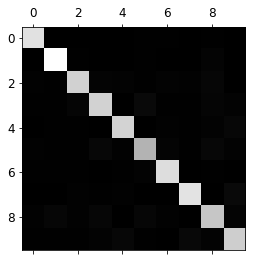

In [75]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [76]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

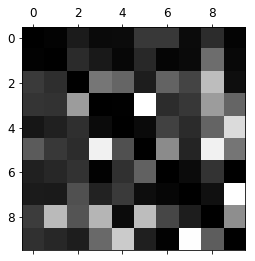

In [77]:
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [78]:
# multilabel classification

from sklearn.neighbors import KNeighborsClassifier

Y_train_large = (Y_train >=7)
Y_train_odd = (Y_train%2==1)
Y_multilabel = np.c_[Y_train_large, Y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit( X_train, Y_multilabel)

knn_clf.predict([some_digit])

array([[False,  True]])

In [110]:
# multioutput classification

noise = np.random.randint(0,100, (len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100, (len(X_test),784))
X_test_mod = X_test + noise
Y_train_mod = X_train
Y_test_mod = Y_test

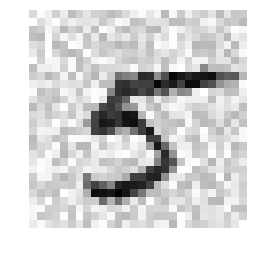

In [111]:
some_index=5500
original_image = X_test_mod[some_index].reshape(28,28)
plt.imshow(original_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

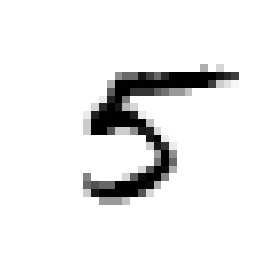

In [115]:
some_index=5500
original_image = X_test[some_index].reshape(28,28)
plt.imshow(original_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [112]:
knn_clf.fit(X_train_mod, Y_train_mod)
some_index=5500
clean_digit = knn_clf.predict([X_test_mod[some_index]])


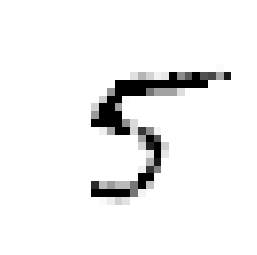

In [113]:
clean_digit_image = clean_digit.reshape(28,28)
plt.imshow(clean_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()